# Machine Learning <a id='back'></a>

# Introduction 


# Project Description 


This project is to develop a model that can analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. The accuracy of the model needs to meet or exceed a threshold of 0.75. Check the quality of the model using the test set. The preprocessed dataset containing behavior data of subscribers who have already switched to the new plans is stored in the file `users_behavior.csv`. Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
 * `'сalls'` — number of calls,
 * `'minutes'` — total call duration in minutes,
 * `'messages'` — number of text messages,
 * `'mb_used'` — Internet traffic used in MB,
 * `'is_ultra'` — plan for the current month (Ultra - 1, Smart - 0).

My project consists of three stages:
 1. Data overview and preprocessing.
 2. Model development, including model quality evaluation and sanity check.
       * Decision Tree Classifier
       * Random Forest Classifier
       * Logistic Regression
 3. Findings.

## Stage 1. Data overview and preprocessing  

Open the data and explore it. Correct data types. Check for missing values and duplicates. Prepare the data for analysis.

As mentioned in description, the data has been preprocessed. However, let's perform some basic checks on the data to ensure its quality and suitability for model development.

In [1]:
# importing necessary libraries for data analysis, modeling, and visualization
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# uploading dataset
df = pd.read_csv('/datasets/users_behavior.csv') 

In [3]:
# examening data
display(df.sample(5))
print()
df.info()

,calls,minutes,messages,mb_used,is_ultra
1597,92.0,719.71,66.0,23827.53,0
2991,60.0,351.44,85.0,21943.86,0
2759,93.0,603.04,39.0,26523.98,1
1285,64.0,432.25,14.0,20009.42,0
2266,62.0,401.18,47.0,17199.43,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# checking for duplicates
print(df.duplicated().sum())

0


In [5]:
# checking for missing values
print(df.isna().sum())

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [6]:
# checking values in 'is_ultra' column
# should be onle two values (Ultra - 1, Smart - 0)
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

### Conclusions

* Data has no missing values or duplicates.
* There are more subscribers who use the Smart plan compared to the Ultra plan.
* The data is suitable for model development.

## Stage 2. Model Development

### Splitting the data

In [7]:
# initializing features and target
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']
print(features.shape)
print(target.shape)

(3214, 4)
(3214,)


We need to split the data into a training set, a validation set, and a test set. 

The preferable ratio would be 3:1:1, which means 60% - training set, 20% - validation set, 20% - test set.

In [8]:
# splitting the data into a training set, a validation set, and a test set

# sets for training and testing
features_train, features_test, target_train, target_test = train_test_split(features,     
                                                                         target, 
                                                                         test_size=0.2, 
                                                                         random_state=12345)
# sets for training and validation
features_train, features_valid, target_train, target_valid = train_test_split(features_train,     
                                                                         target_train, 
                                                                         test_size=0.25, 
                                                                         random_state=12345)
print('The shape of training set: ', features_train.shape, target_train.shape)
print('The shape of testing set: ', features_test.shape, target_test.shape)
print('The shape of validation set: ', features_valid.shape, target_valid.shape)

The shape of training set:  (1928, 4) (1928,)
The shape of testing set:  (643, 4) (643,)
The shape of validation set:  (643, 4) (643,)


### Model 1 - Decision Tree Classifier

The most important hyperparameter for Decision Tree is maximum depth.

In [9]:
# determining the optimal maximum depth
best_model = None
best_accuracy = 0
best_depth = 0
for depth in range (1, 21):
    model_1 = DecisionTreeClassifier(max_depth=depth, random_state=12345) # setting a model (Decision Tree Classifier)
    model_1.fit(features_train, target_train)                             # training the model
    predictions_valid = model_1.predict(features_valid)                   # getting the model's predictions
    accuracy = accuracy_score(target_valid, predictions_valid)            # calculating the accuracy on validation set
    if accuracy > best_accuracy:
        best_model = model_1
        best_accuracy = accuracy
        best_depth = depth
print('The optimal depth is: ', best_depth)
print('Accuracy of the best model on the validation set is: ', best_accuracy)

The optimal depth is:  7
Accuracy of the best model on the validation set is:  0.7744945567651633


In [10]:
# calculating the accuracy of the model on the test set
predictions_test = best_model.predict(features_test)                 # getting the model's predictions on the test set
accuracy_test = accuracy_score(target_test, predictions_test)        # calculating the accuracy on the test set
print('Accuracy of the best model on the test set:', accuracy_test)

Accuracy of the best model on the test set: 0.7884914463452566


In [11]:
# checking if accuracy meets the threshold
threshold = 0.75
if accuracy_test >= threshold:
    print(f'The accuracy on the test set {accuracy_test:.2f} meets the threshold of {threshold}. Sanity check passed!')
else:
    print(f'The accuracy on the test set {accuracy_test:.2f} does not meet the threshold of {threshold}. Sanity check failed!')

if best_accuracy >= threshold:
    print(f'The accuracy on the validation set {best_accuracy:.2f} meets the threshold of {threshold}')
else:
    print(f'The accuracy on the validation set {best_accuracy:.2f} does not meet the threshold of {threshold}')

The accuracy on the test set 0.79 meets the threshold of 0.75. Sanity check passed!
The accuracy on the validation set 0.77 meets the threshold of 0.75


The accuracy on the test set meets the threshold. Let's calculate and plot the confusion matrix to get a detailed summary of the model's performance and to evaluate how well the model is making correct and incorrect predictions for each class.

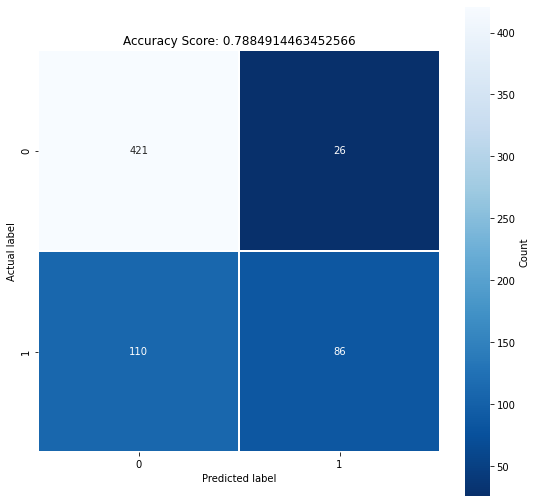

In [12]:
# calculating the confusion matrix for Decision Tree Classifier
cm_dtc = confusion_matrix(target_test, predictions_test)
# plotting a heatmap of the confusion matrix 
plt.figure(figsize=(9, 9))
sns.heatmap(cm_dtc,
            annot=True,
            fmt='',
            linewidths=.5,
            square = True, 
            cmap = 'Blues_r',
            cbar_kws={'label': 'Count'},)
plt.title('Accuracy Score: {0}'.format(accuracy_test))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

True Positives: 86 - The number of correctly predicted 'Ultra' (positive) instances.

False Positives: 26 - The number of 'Smart' (negative) instances wrongly classified as 'Ultra'.

False Negatives: 110 - The number of 'Ultra' instances wrongly classified as 'Smart'.

True Negatives: 421 - The number of correctly predicted 'Smart' instances.

Let's calculate precision and recall:

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives / (True Positives + False Negatives)

In [13]:
# extracting True Positives, False Positives, and False Negatives from the confusion matrix
TP_dtc = cm_dtc[1, 1]
FP_dtc = cm_dtc[0, 1]
FN_dtc = cm_dtc[1, 0]
# calculating precision and recall for Decision Tree Classifier
precision_dtc = TP_dtc / (TP_dtc + FP_dtc)
recall_dtc = TP_dtc / (TP_dtc + FN_dtc)
print(f'Precision for Decision Tree Classifier: {precision_dtc:.2f}')
print(f'Recall for Decision Tree Classifier: {recall_dtc:.2f}')

Precision for Decision Tree Classifier: 0.77
Recall for Decision Tree Classifier: 0.44


#### Conclusions

* The optimal maximum depth for the Decision Tree Classifier is found to be 7.
* The best model achieved an accuracy of approximately 0.77 on the validation set.
* The best model achieved an accuracy of approximately 0.79 on the test set.
* The model performs consistently well on both the validation and test sets.
* The accuracy on the validation set and the accuracy on the test set both meet the threshold, indicating that the model performs better than chance.
* The model's precision indicates that when it predicts a subscriber as 'Ultra', it is correct around 77% of the time.
* The model's recall indicates that it is able to correctly identify around 44% of the actual 'Ultra' subscribers.

### Model 2 - Random Forest Classifier

The most important hyperparameters for Random Forest are number of estimators and maximum depth.

In [14]:
# determining the optimal number of estimators and optimal maximum depth
best_model_2 = None
best_accuracy_2 = 0
best_depth_2 = 0
best_est = 0
for est in range(10, 51, 10):
    for depth in range(1, 21):
        model_2 = RandomForestClassifier(max_depth=depth, random_state=12345, n_estimators=est)
        model_2.fit(features_train, target_train)
        predictions_valid_2 = model_2.predict(features_valid)
        accuracy_2 = accuracy_score(target_valid, predictions_valid_2)
        if accuracy_2 > best_accuracy_2:
            best_model_2 = model_2
            best_accuracy_2 = accuracy_2
            best_est = est
            best_depth_2 = depth
print('The optimal number of estimators is:', best_est)
print('The optimal depth is:', best_depth_2)
print('Accuracy of the best model on the validation set:', best_accuracy_2)

The optimal number of estimators is: 20
The optimal depth is: 15
Accuracy of the best model on the validation set: 0.80248833592535


In [15]:
# calculating the accuracy of the model on the test set
predictions_test_2 = best_model_2.predict(features_test)             
accuracy_test_2 = accuracy_score(target_test, predictions_test_2)        
print('Accuracy of the best model on the test set:', accuracy_test_2)

Accuracy of the best model on the test set: 0.7853810264385692


In [16]:
# checking if accuracy meets the threshold
threshold = 0.75
if accuracy_test_2 >= threshold:
    print(f'The accuracy on the test set {accuracy_test_2:.2f} meets the threshold of {threshold}. Sanity check passed!')
else:
    print(f'The accuracy on the test set {accuracy_test_2:.2f} does not meet the threshold of {threshold}. Sanity check failed!')

if best_accuracy_2 >= threshold:
    print(f'The accuracy on the validation set {best_accuracy_2:.2f} meets the threshold of {threshold}')
else:
    print(f'The accuracy on the validation set {best_accuracy_2:.2f} does not meet the threshold of {threshold}')

The accuracy on the test set 0.79 meets the threshold of 0.75. Sanity check passed!
The accuracy on the validation set 0.80 meets the threshold of 0.75


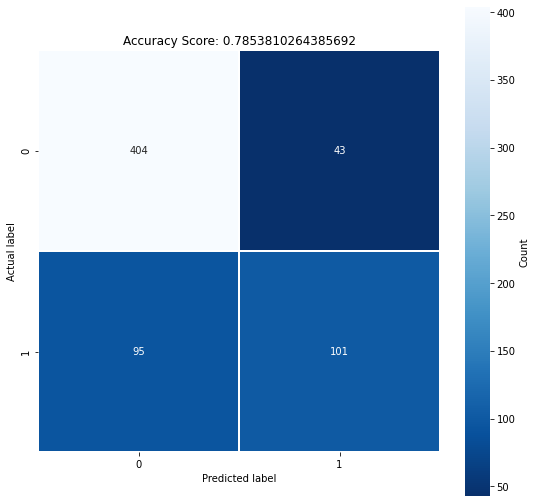

In [17]:
# calculating the confusion matrix for Random Forest Classifier
cm_rfc = confusion_matrix(target_test, predictions_test_2)
# plotting a heatmap of the 
plt.figure(figsize=(9, 9))
sns.heatmap(cm_rfc,
            annot=True,
            fmt='',
            linewidths=.5,
            square = True, 
            cmap = 'Blues_r',
            cbar_kws={'label': 'Count'},)
plt.title('Accuracy Score: {0}'.format(accuracy_test_2))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

True Positives: 101 - The number of correctly predicted 'Ultra' (positive) instances.

False Positives: 43 - The number of 'Smart' (negative) instances wrongly classified as 'Ultra'.

False Negatives: 95 - The number of 'Ultra' instances wrongly classified as 'Smart'.

True Negatives: 404 - The number of correctly predicted 'Smart' instances.

In [18]:
# extracting True Positives, False Positives, and False Negatives from the confusion matrix
TP_rfc = cm_rfc[1, 1]
FP_rfc = cm_rfc[0, 1]
FN_rfc = cm_rfc[1, 0]
# calculating precision and recall for Random Forest Classifier
precision_rfc = TP_rfc / (TP_rfc + FP_rfc)
recall_rfc = TP_rfc / (TP_rfc + FN_rfc)
print(f'Precision for Random Forest Classifier: {precision_rfc:.2f}')
print(f'Recall for Random Forest Classifier: {recall_rfc:.2f}')

Precision for Random Forest Classifier: 0.70
Recall for Random Forest Classifier: 0.52


#### Conclusions

* The optimal number of trees in the forest is found to be 20.
* The optimal maximum depth for the Random Forest Classifier is 15.
* The model achieved an accuracy of approximately 0.80 on the validation set.
* The accuracy of the model on the independent test set is approximately 0.79.
* The model performs consistently well on both the validation and test sets.
* The accuracy on the validation set and the accuracy on the test set both meet the threshold, indicating that the model performs better than chance.
* The model's precision indicates that when it predicts a subscriber as 'Ultra', it is correct around 70% of the time.
* The model's recall indicates that it is able to correctly identify around 52% of the actual 'Ultra' subscribers.

### Model 3 - Logistic Regression

Here we will test different solvers.

In [19]:
# determining the best solver
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']   # solvers to test
best_solver = None
best_accuracy_3 = 0
for solver in solvers:
    model_3 = LogisticRegression(solver=solver, random_state=12345)
    model_3.fit(features_train, target_train)
    predictions_valid_3 = model_3.predict(features_valid)
    accuracy_3 = accuracy_score(target_valid, predictions_valid_3)
    if accuracy_3 > best_accuracy_3:
            best_solver = solver
            best_model_3 = model_3
            best_accuracy_3 = accuracy_3            
print('The best solver is:', best_solver)
print('Accuracy of the best model on the validation set:', best_accuracy_3)

The best solver is: liblinear
Accuracy of the best model on the validation set: 0.7293934681181959


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [20]:
# calculating the accuracy of the model on the test set
predictions_test_3 = best_model_3.predict(features_test)             
accuracy_test_3 = accuracy_score(target_test, predictions_test_3)        
print('Accuracy of the best model on the test set:', accuracy_test_3)

Accuracy of the best model on the test set: 0.7511664074650077


In [21]:
# checking if accuracy meets the threshold
threshold = 0.75
if accuracy_test_3 >= threshold:
    print(f'The accuracy on the test set {accuracy_test_3:.2f} meets the threshold of {threshold}. Sanity check passed!')
else:
    print(f'The accuracy on the test set {accuracy_test_3:.2f} does not meet the threshold of {threshold}. Sanity check failed!')

if best_accuracy_3 >= threshold:
    print(f'The accuracy on the validation set {best_accuracy_3:.2f} meets the threshold of {threshold}')
else:
    print(f'The accuracy on the validation set {best_accuracy_3:.2f} does not meet the threshold of {threshold}')

The accuracy on the test set 0.75 meets the threshold of 0.75. Sanity check passed!
The accuracy on the validation set 0.73 does not meet the threshold of 0.75


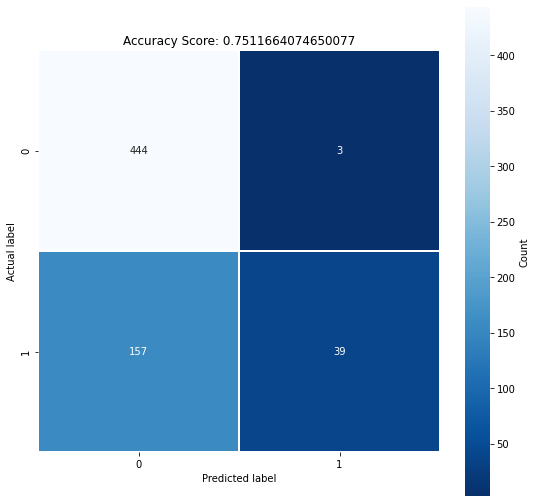

In [22]:
# calculating the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(target_test, predictions_test_3)
# plotting a heatmap of the 
plt.figure(figsize=(9, 9))
sns.heatmap(cm_lr,
            annot=True,
            fmt='',
            linewidths=.5,
            square = True, 
            cmap = 'Blues_r',
            cbar_kws={'label': 'Count'},)
plt.title('Accuracy Score: {0}'.format(accuracy_test_3))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

True Positives: 39 - The number of correctly predicted 'Ultra' (positive) instances.

False Positives: 3 - The number of 'Smart' (negative) instances wrongly classified as 'Ultra'.

False Negatives: 157 - The number of 'Ultra' instances wrongly classified as 'Smart'.

True Negatives: 444 - The number of correctly predicted 'Smart' instances.

In [23]:
# extracting True Positives, False Positives, and False Negatives from the confusion matrix
TP_lr = cm_lr[1, 1]
FP_lr = cm_lr[0, 1]
FN_lr = cm_lr[1, 0]
# calculating precision and recall for Logistic Regression
precision_lr = TP_lr / (TP_lr + FP_lr)
recall_lr = TP_lr / (TP_lr + FN_lr)
print(f'Precision for Logistic Regression: {precision_lr:.2f}')
print(f'Recall for Logistic Regression: {recall_lr:.2f}')

Precision for Logistic Regression: 0.93
Recall for Logistic Regression: 0.20


#### Conclusions

* The best solver is 'liblinear'.
* Logistic Regression model achieved an accuracy of 0.73 on the validation set.
* The accuracy of the model on the test set is approximately 0.75.
* The model performs consistently well on both the validation and test sets.
* The accuracy on the validation set doesn't meet the threshold, and the accuracy on the test set meets the threshold.
* The model's precision indicates that when it predicts a subscriber as 'Ultra', it is correct around 93% of the time.
* The model's recall is relatively low, indicating that it is not very effective at correctly identifying 'Ultra' subscribers, capturing only around 20% of the actual "Ultra" subscribers.

## Findings

In this project, we aimed to develop a model that can analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. The accuracy of the model needed to meet or exceed a threshold of 0.75. After conducting data preprocessing, we developed three classification models: Decision Tree Classifier, Random Forest Classifier, and Logistic Regression, and evaluated their performance using the test set. The calculation results are shown in a table:


| Model | Valid Set Accuracy | Test Set Accuracy | True Positive | False Positive | False Negative | True Negative | Precision | Recall |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Decision Tree | 0.77 | 0.79 | 86 | 29 | 110 | 421 | 0.77 | 0.44 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Random Forest | 0.80 | 0.79 | 101 | 43 | 95 | 404 | 0.70 | 0.52 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Logistic Regression  | 0.73 | 0.75 | 39 | 3 | 157 | 444 | 0.93 | 0.20 | 

Conclusions:

* Decision Tree Model: The best Decision Tree model has an optimal depth of 7. It achieved an accuracy of approximately 0.79 on the test set. The model's precision is 0.77, indicating that when it predicts a subscriber as "Ultra," it is correct around 77% of the time. However, its recall is 0.44, meaning it may miss identifying around 56% of the actual "Ultra" subscribers.

* Random Forest Model: The best Random Forest model has an optimal number of trees of 20 and an optimal depth of 15. It achieved an accuracy of approximately 0.79 on the test set. The model's precision is 0.70, and the recall is 0.52, indicating a balanced performance in correctly predicting "Ultra" subscribers. Random Forest model achieved the highest accuracy on both the validation and test sets.

* Logistic Regression Model: The best Logistic Regression model uses the 'liblinear' solver. It achieved an accuracy of approximately 0.75 on the test set. The model's precision is relatively high at 0.93, indicating that when it predicts a subscriber as "Ultra," it is correct around 93% of the time. However, its recall is relatively low at 0.20, suggesting that it is not very effective at correctly identifying "Ultra" subscribers, capturing only around 20% of the actual "Ultra" subscribers.

* Threshold: For all models, the accuracy on the test set met the threshold of 0.75, indicating that the models perform better than chance.

Model Recommendations:

The Random Forest Classifier is the recommended model for this task. It achieved the highest overall accuracy and demonstrated a balanced precision and recall, making it well-suited for predicting subscribers' behavior and recommending plans. Additionally, the Random Forest model's ability to handle various data distributions and avoid overfitting contributes to its robustness and reliability.